# S05T01: Tasca metodes de mostreig
Aprèn a realitzar mostreig de les dades amb Python.
## - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

<font color='blue'>The database we'll use for this exercise will be the statistics of <b>La Liga 1995-2021</b>, the Spanish soccer league.</font>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

liga = pd.read_csv(r'laliga.csv')
liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


<font color='blue'>Looks like the dataset have more than 10.000 entries, which will make it complex to process for the computer. In face of that, let's extract a series of samples seeing the different way we have to do it. We'll always try to extract the same size of sample (500) irrespective of the method used. Also, we'll simplify the exercise by focusing only on the average goals scored by away teams by the end of the match: <br>
### <span class="mark">- SIMPLE RANDOM SAMPLE</span>

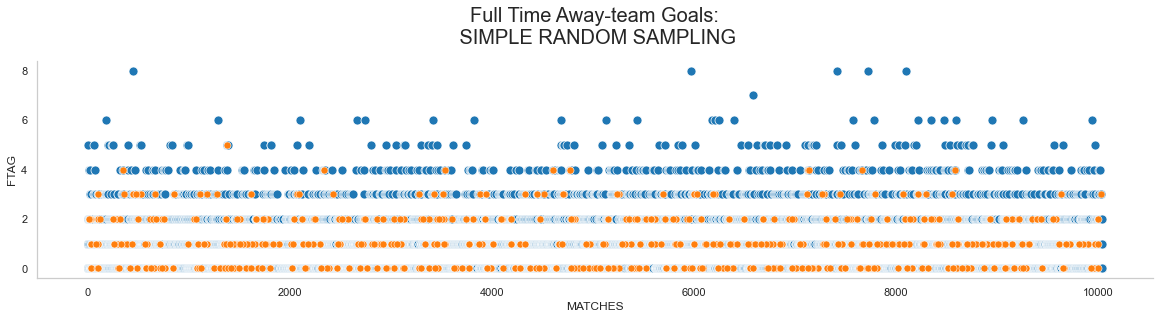


AVERAGE OF GOALS AWAY:  1.119


In [113]:
sample_size = 500
liga_copy = liga.copy()
liga2 = liga.copy()
sim_sample=liga.sample(sample_size, random_state=42)
sim_sample.drop(sim_sample.columns.difference(['FTAG']), axis=1, inplace=True)

#plot function for later
def liga_plots(population, sample, sample_method):
    fig, ax=plt.subplots(figsize=(20,4))
    sns.set_context("talk")
    sns.set_style("whitegrid")
    ax1=sns.scatterplot(data=population, x=population.index, y=population.FTAG)

    ax2=sns.scatterplot(data=sample, x=sample.index, y=sample.FTAG, s=50)
    ax2.set_xlabel("MATCHES")
    ax2.grid(False)
    sns.despine()
    plt.title(sample_method, fontsize=20, y=1.05)
    plt.show()

#plot
sample_method = "Full Time Away-team Goals:\n SIMPLE RANDOM SAMPLING" 
liga_plots(liga, sim_sample, sample_method)
    
#getting the average of goals scored by away teams
avg_simple=liga.FTAG.mean()
avgs={"Simple Random Sampling":[], "Systematic Sampling":[], "Stratified Sampling (disproportionate)":[], 
       "Stratified Sampling (proportionate)":[], "SMOTE":[]}

avgs["Simple Random Sampling"] = avg_simple

print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_simple))

<font color='blue'>We see how the simple random sample selected 500 sample units fully randomly, even the order is not linear. <br>The result of calculating the <b>average of goals scored away</b> is <b>1.12</b> when using the simple random sampling.
### <span class="mark">- SYSTEMATIC SAMPLE</span>

/Users/paullarripa/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


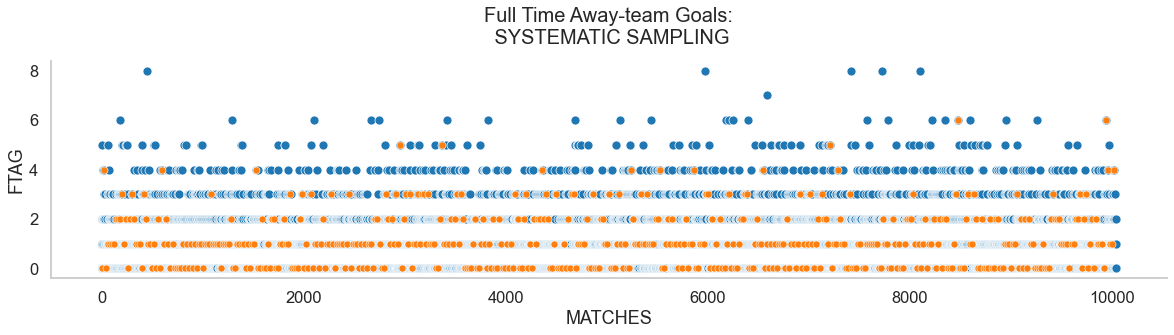


AVERAGE OF GOALS AWAY:  1.130


In [114]:
sample_size = 500                   #determining the size of the sample we want
popul_size = len(liga)              #saving the total size of the popullation 
step = popul_size/sample_size       #getting the 'step' we'll use to set the systematic sample

#function that will make the systematic sample
def systematic_sample(liga, step):
    sys_indexes=np.arange(0, popul_size, step=step)
    sys_sample=liga.iloc[sys_indexes]
    return sys_sample

sys_sample = systematic_sample(liga, step)
sys_sample.drop(sys_sample.columns.difference(["FTAG"]), inplace=True, axis=1)

#plots
sample_method = "Full Time Away-team Goals:\n SYSTEMATIC SAMPLING" 
liga_plots(liga, sys_sample, sample_method)

#getting the average of goals scored by away teams
avg_systematic=sys_sample.FTAG.mean()
avgs["Systematic Sampling"] = avg_systematic
print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_systematic))

<font color='blue'>The effect of the systematic random sample is visible, it read thru the full dataset and knowing that we asked for a sample of 500 units it set and structured sampling method of taking an instance every 20 units, starting from 0.<br>After calculating the <b>average of goals away</b> using this sample the result is <b>1.13</b>, which slightly differs from the sample random method but it's very very close.
## - Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).
### <span class="mark">- STRATIFIED SAMPLE</span>
<font color='blue'>Using this sampling method we will group the data by a parameter first, and then take samples randomly within every group.<br> Specifically we will use the "Season" parameter to group the matches by season, and take samples from each season. To start, how we wonder many seasons are there:

In [115]:
liga_copy.Season.nunique()

26

<font color='blue'>Looks like there are 26 seasons from 1995 to 2021.<br>Now, do every season have the same number of matches? Let's figure it out:

<AxesSubplot:xlabel='Season'>

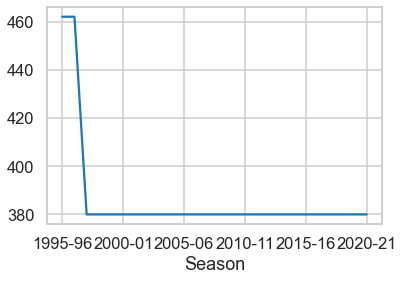

In [116]:
x = liga_copy.groupby("Season").Date.count()
x.plot()

<font color='blue'>Looks like not every season had the same amount of matches. <b>But why do we need this information?</b><br> The reason behind is that if we do the stratified arrangement of matches, and we extract the same number of sample from each season, the first two seasons (which had 460 matches) will be sharing proportionately less samples than the rest of the seasons (which had 380 matches). This is wouldn't be wrong, but we need to be aware that there are two ways of doing a <b>stratified sampling</b>. <br><br>One is taking the same number of samples from all strata (stratified groups) which is called <b>Disproportionate Sampling</b>. <br>The other way will compensate the effect that the first season is causing by having more matches, and it's called <b>Proportionate Sampling</b>.

#### - DISPROPORTIONATE STRATIFIED SAMPLING
<font color='blue'>Since we want our sample to size 500, and we will have 26 strata (seasons), we will extract 19 units from each stratum (which makes up 494 units, close enough).

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19])

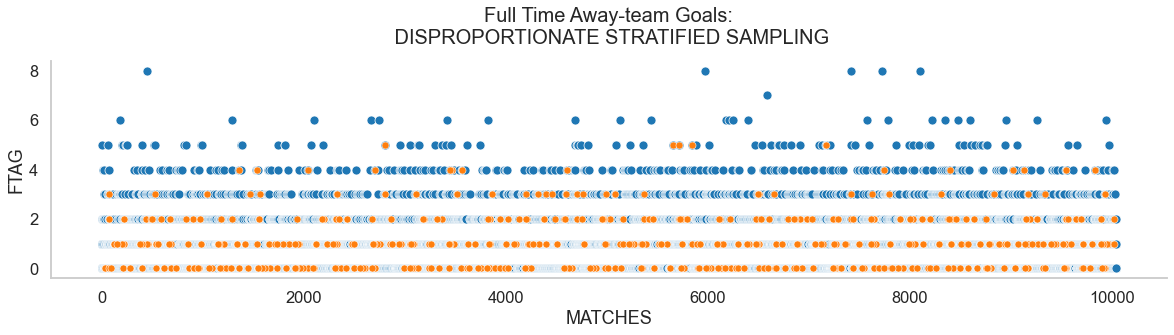


AVERAGE OF GOALS AWAY:  1.095


In [117]:
strat_sample = liga_copy.groupby("Season", group_keys=False).apply(lambda x: x.sample(19, random_state=42))
display(strat_sample["Season"].value_counts().values)

strat_sample.drop(strat_sample.columns.difference(['FTAG']), axis=1, inplace=True)

#plot
sampling_method="Full Time Away-team Goals:\n DISPROPORTIONATE STRATIFIED SAMPLING" 
liga_plots(liga, strat_sample, sampling_method)

#getting the average of goals scored by away teams
avg_strat=strat_sample.FTAG.mean()
avgs["Stratified Sampling (disproportionate)"] = avg_strat
print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_strat))

<font color='blue'>Following the disproportionate version of stratified sampling, each season will give exactly 19 sample units. This way of getting samples came out with an average of away goals of <b>1.095</b>. Still very close to the rest of samples' means. 
#### - PROPORTIONATE STRATIFIED SAMPLING
<font color='blue'>Let's now see how we can do an stratified sampling but following a proportionate logic. This will mean that out of each group (seasons) we will extract a diferent number of sample units, depending on the size of the group compared to the total population.

array([23, 23, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19])

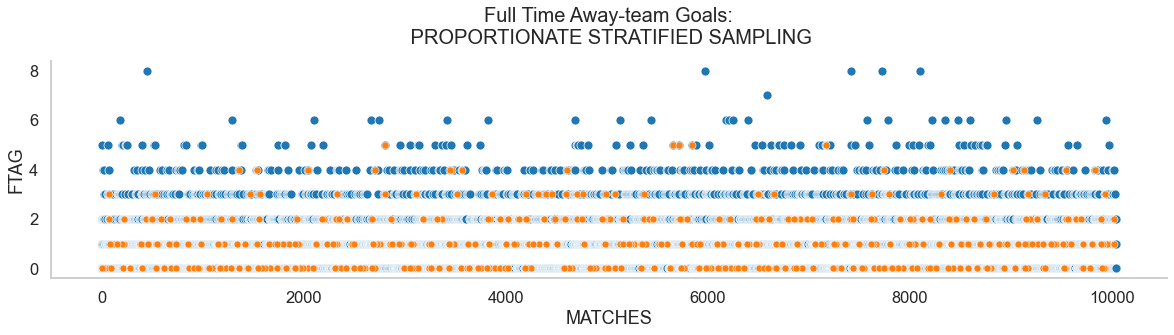


AVERAGE OF GOALS AWAY:  1.090


In [118]:
#we will need the sample size in percentage of the populaition
perc = sample_size/popul_size
strat2_sample = liga_copy.groupby("Season", group_keys=False).apply(lambda x: x.sample(frac=perc, random_state=42))
display(strat2_sample["Season"].value_counts().values)

strat2_sample.drop(strat2_sample.columns.difference(["FTAG"]), axis=1, inplace=True)

#plot
sampling_method="Full Time Away-team Goals:\n PROPORTIONATE STRATIFIED SAMPLING" 
liga_plots(liga, strat2_sample, sampling_method)

#getting the average of goals scored by away teams
avg_strat=strat2_sample.FTAG.mean()
avgs["Stratified Sampling (proportionate)"] = avg_strat
print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_strat))

<font color='blue'>With the proportionate version of stratified sampling, the first difference we see is that the first two seasons now gave away more sample units than the other seasons (23 vs 19), since these first two seasons have a higher representation of matches within the population.<br><br>
    Finally, the average of goals awat following this sampling technique is resulting to <b>1.090</b>. Once again, different from the other sampling techniques but very close. We can assume that this method is potentially reducing more hidden bias than the others.

### <span class="mark">- SMOTE sample</span>

<font color='blue'>To carry over the sampling using SMOTE, we will simulate that the first two seasons have many less matches compared to the rest of seasons:

[380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380
 380 380 380 380 380 380  46  46]


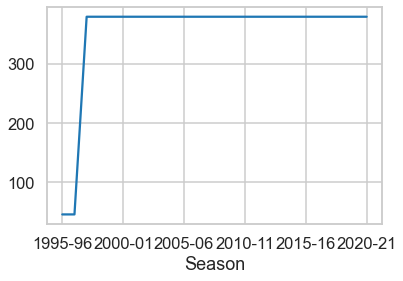

In [119]:
x = (liga_copy["Season"]=="1995-96") | (liga_copy["Season"]=="1996-97")
indexes= liga_copy[x].index
indexes=indexes[46:878]
liga_imb = liga_copy.copy()
liga_imb.drop(liga_imb.index[indexes], inplace=True)
liga_imb.groupby('Season').count()['FTAG'].plot()
print(liga_imb["Season"].value_counts().values)

<font color='blue'>With that line of code we basically reduced the amount of matches that the first two seasons originally had (from former approx. 460 matches to current approx. 50 matches). This way, now the average of goals represented by these first two seasons will have a much lesser impact in the overall mean due to its scarcity of matches. Now that we are all set, let's see how can the <b>SMOTE</b> sampling method offset this imbalance:

[380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380
 380 380 380 380 380 380 380  46]


<AxesSubplot:xlabel='Season'>

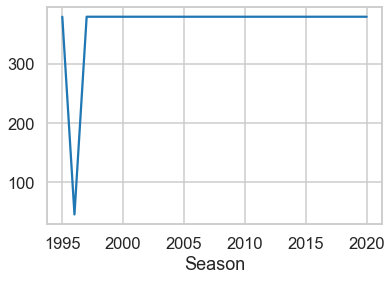

In [120]:
from imblearn.over_sampling import SMOTE

#converting the season year to float in order to run SMOTE
liga_imb["Season"] = liga_imb["Season"].apply(lambda x: float(x[:4]))

#oversampling Season 1995
smote = SMOTE(sampling_strategy = 'minority')
liga_imb.drop(liga_imb.columns.difference(["FTAG", "Season"]), axis=1, inplace=True)
X_sm, y_sm = smote.fit_resample(liga_imb, liga_imb['Season'])


print(y_sm.value_counts().values)
X_sm.groupby('Season').count()['FTAG'].plot()

<font color='blue'>On the first attempt to apply SMOTE we can see how the season 1995-96 has succesfully been oversampled to match the rest of the seasons, increasing from 46 to 380 matches. <br>Now let's rerun the SMOTE method to oversample the 1996-97 season too:

[380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380 380
 380 380 380 380 380 380 380 380]


(0.0, 450.0)

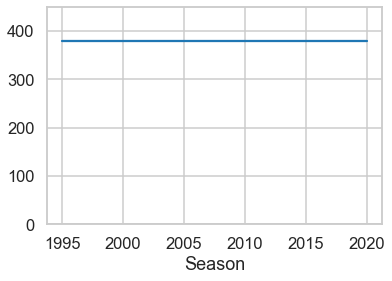

In [121]:
#oversampling Season 1996
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_sm, X_sm['Season'])

print(y_sm.value_counts().values)
X_sm.groupby('Season').count()['FTAG'].plot()
plt.ylim(0,450)

<font color='blue'>We did it! Now we have the who dataframe balanced with all seasons having the same number of matches, 380. The last step it's just about applying one of the random sampling techniques we discussed earlier. This time we will choose the <b>Statified Sampling</b> method and see what mean result we get from it:

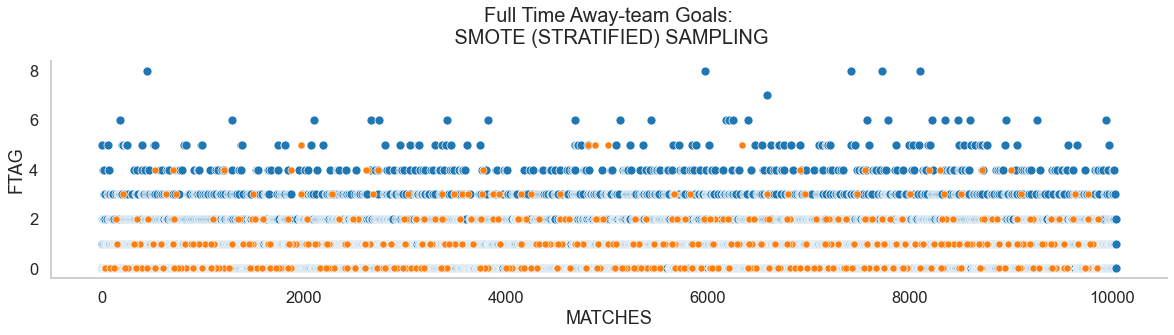


AVERAGE OF GOALS AWAY:  1.075


In [122]:
perc = sample_size/popul_size
smote_sample = X_sm.groupby("Season", group_keys=False).apply(lambda x: x.sample(frac=perc, random_state=42))

X_sm.drop(strat_sample.columns.difference(['FTAG']), axis=1, inplace=True)

#plot
sampling_method="Full Time Away-team Goals:\n SMOTE (STRATIFIED) SAMPLING" 
liga_plots(liga, smote_sample, sampling_method)

#getting the average of goals scored by away teams
avg_smote=smote_sample.FTAG.mean()
avgs["SMOTE"] = avg_smote
print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_smote))

<font color='blue'>After applying <b>SMOTE+Stratified</b> sampling, the average number of goals scored by the away team is <b>1.091</b>, still close to the other means. 

## - Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

### <span class="mark">- RESERVOIR sample</span>
<font color='blue'>Used in data mining to obtain a sample of size n from a data stream of unknown length.

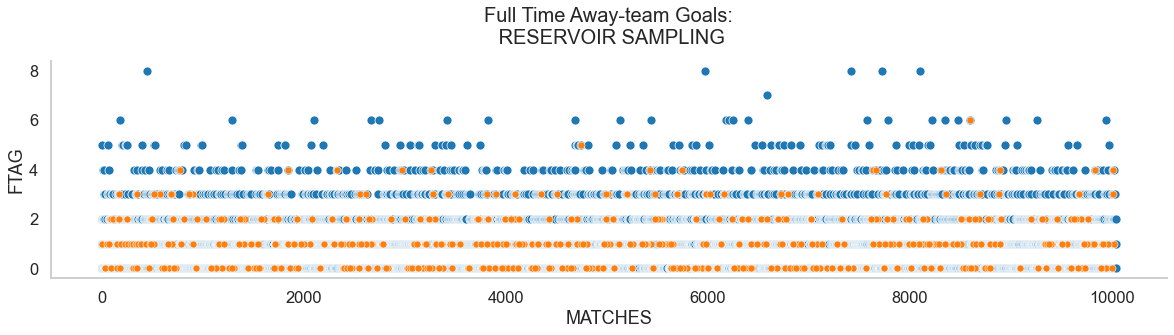


AVERAGE OF GOALS AWAY:  1.092


In [123]:
import random
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
        
# Create a stream generator with
stream = generator(popul_size)


# Doing Reservoir Sampling from the stream
k=sample_size
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element

# Using the sample list as indexes to get rows from the dataframe
reserv_sample = liga.iloc[reservoir]

#plot
sampling_method="Full Time Away-team Goals:\n RESERVOIR SAMPLING" 
liga_plots(liga, reserv_sample, sampling_method)

#getting the average of goals scored by away teams
avg_reserv=reserv_sample.FTAG.mean()
avgs["Reservoir Sampling"] = avg_reserv
print("\nAVERAGE OF GOALS AWAY: ", "{:.3f}".format(avg_reserv))

sns.set_context('notebook')

<font color='blue'>We have simulated a stream of data with the original soccer season's dataset. While the stream of data kept flowing the code took and replaced the samples until the stream was ended. Then we used the index numbers to select the rows and calculate the mean of FTAG, which is close to the rest of average results. <br><br>Let's now put all of them side by side to compare:

Text(0.5, 1.05, 'AVERAGE GOALS AWAY TEAM')

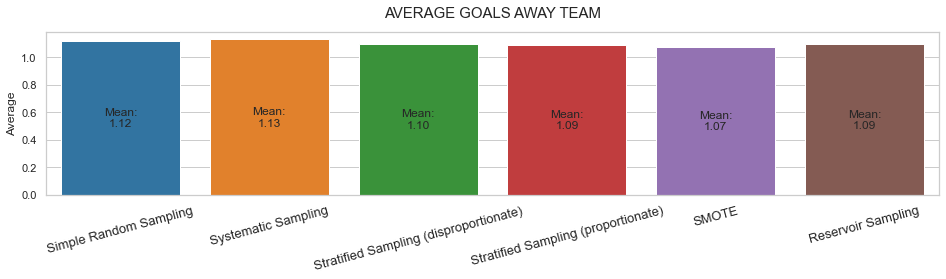

In [124]:
avgs = pd.DataFrame(avgs, index=[0])
fig = plt.subplots(figsize=(16,3))
ax1 = sns.barplot(x=avgs.columns, y=avgs.iloc[0])
ax1.set_ylabel("Average")
ax1.bar_label(ax1.containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, fontsize=13)
plt.title("AVERAGE GOALS AWAY TEAM", fontsize=15, y=1.05)

<font color='blue'>Finally we can compare the different mean values obtained following each sampling method. Whilst they differ slightly from each other, all of them are close to 1.1 goals scored by the away teams across the seasons. <br>Lastly, let's observe how we picked sample units from the population using all the techniques, but in a single plot:

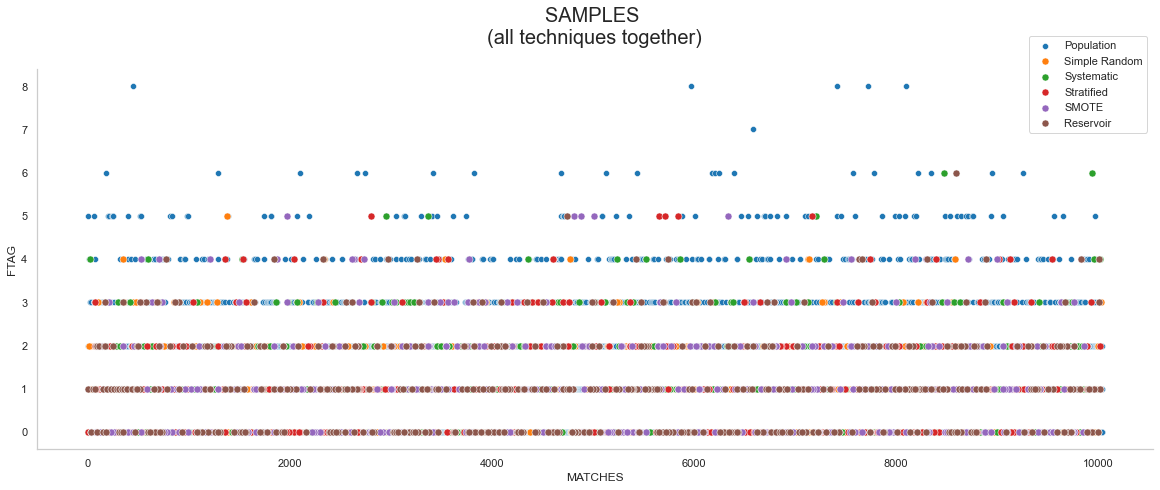

In [125]:
fig, ax=plt.subplots(figsize=(20,7))
sns.set_style("whitegrid")
ax1=sns.scatterplot(data=liga, x=liga.index, y=liga.FTAG)

def liga_plots(population, sample):
    ax2=sns.scatterplot(data=sample, x=sample.index, y=sample.FTAG, s=50)
    ax2.set_xlabel("MATCHES")
    ax2.grid(False)
    sns.despine()
    plt.title("SAMPLES \n(all techniques together)", fontsize=20, y=1.05)


liga_plots(liga, sim_sample)
liga_plots(liga, sys_sample)
liga_plots(liga, strat2_sample)
liga_plots(liga, smote_sample)
liga_plots(liga, reserv_sample)

plt.legend(labels=["Population",avgs.columns[0][:13],avgs.columns[1][:10],avgs.columns[3][:10],
                   avgs.columns[4], avgs.columns[5][:10]], bbox_to_anchor = (1,1.1))
plt.show()

<font color="blue">We can clearly see how the different sampling techniques took different sample units.